<a href="https://colab.research.google.com/github/thankidarpan/Darpan-Thanki-Projects/blob/main/Hotel%20Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Data Cleaning using NLP and help with sentiment analysis of the attached file

Here is all the data you need:
"Hotel Reviews_Data Analysis.csv"

## Data loading

### Subtask:
Load the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the data into a pandas DataFrame and display the first few rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Hotel Reviews_Data Analysis.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Hotel Reviews_Data Analysis.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,08-03-2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,08-03-2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Examine the shape, data types, missing values, and descriptive statistics of the DataFrame, along with distributions and patterns in key columns.



Shape of the DataFrame: (515738, 17)

Data Types:
Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object

Missing Values:
H

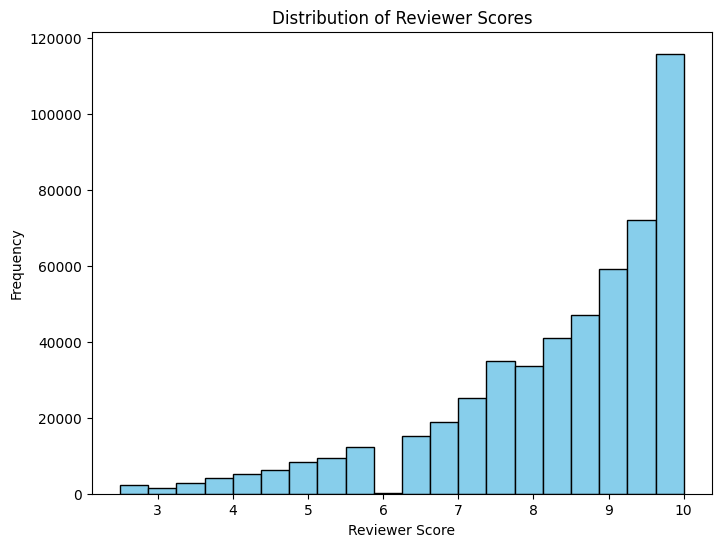


Negative Review Examples:
0     I am so angry that i made this post available...
1                                          No Negative
2     Rooms are nice but for elderly a bit difficul...
3     My room was dirty and I was afraid to walk ba...
4     You When I booked with your company on line y...
5     Backyard of the hotel is total mess shouldn t...
6     Cleaner did not change our sheet and duvet ev...
7     Apart from the price for the brekfast Everyth...
8     Even though the pictures show very clean room...
9     The aircondition makes so much noise and its ...
Name: Negative_Review, dtype: object

Positive Review Examples:
0     Only the park outside of the hotel was beauti...
1     No real complaints the hotel was great great ...
2     Location was good and staff were ok It is cut...
3     Great location in nice surroundings the bar a...
4      Amazing location and building Romantic setting 
5     Good restaurant with modern design great chil...
6     The room is spacious an

In [2]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Display the data types of each column
print("\nData Types:")
print(df.dtypes)

# Check for missing values
print("\nMissing Values:")
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_values_percentage)

# Analyze the distribution of the Reviewer_Score column
print("\nReviewer Score Statistics:")
print(df['Reviewer_Score'].describe())

# Visualize the distribution with a histogram
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df['Reviewer_Score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Reviewer Score')
plt.ylabel('Frequency')
plt.title('Distribution of Reviewer Scores')
plt.show()

# Examine the Negative_Review and Positive_Review columns
print("\nNegative Review Examples:")
print(df['Negative_Review'].head(10))
print("\nPositive Review Examples:")
print(df['Positive_Review'].head(10))
print("\nLength of Negative Reviews:")
print(df['Negative_Review'].str.len().describe())
print("\nLength of Positive Reviews:")
print(df['Positive_Review'].str.len().describe())

# Explore other relevant columns
print("\nHotel Names and Counts:")
print(df['Hotel_Name'].value_counts().head(10))
print("\nAverage Score Statistics:")
print(df['Average_Score'].describe())
print("\nHotel Address Examples:")
print(df['Hotel_Address'].head(10))

## Data cleaning

### Subtask:
Clean the data by handling missing values and removing duplicate reviews.


**Reasoning**:
Handle missing values in 'lat' and 'lng' columns by removing rows with missing values, as the number of missing values is small (0.63%) and imputation might introduce bias. Then, remove duplicate rows based on all columns to ensure data integrity.



In [3]:
# Remove rows with missing values in 'lat' and 'lng' columns
df.dropna(subset=['lat', 'lng'], inplace=True)

# Remove duplicate rows based on all columns
df.drop_duplicates(inplace=True)

## Data wrangling

### Subtask:
Clean the review text data using NLP techniques.


**Reasoning**:
Combine the 'Positive_Review' and 'Negative_Review' columns, remove punctuation, convert to lowercase, remove stop words, and apply stemming.



In [4]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download required NLTK data
try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
try:
    PorterStemmer()
except LookupError:
    nltk.download('punkt')

# Combine reviews
df['Review'] = df.apply(lambda row: row['Positive_Review'] if row['Negative_Review'] == 'No Negative' else (row['Negative_Review'] if row['Positive_Review'] == 'No Positive' else row['Positive_Review'] + ' ' + row['Negative_Review']), axis=1)
df.loc[(df['Positive_Review'] == 'No Positive') & (df['Negative_Review'] == 'No Negative'), 'Review'] = 'No Review'

# Remove punctuation
df['Review'] = df['Review'].apply(lambda x: ''.join([c for c in x if c not in string.punctuation]))

# Convert to lowercase
df['Review'] = df['Review'].str.lower()

# Remove stop words and apply stemming
stemmer = PorterStemmer()
df['Review'] = df['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split() if word not in stop_words]))

display(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,08-03-2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,park outsid hotel beauti angri made post avail...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,08-03-2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,real complaint hotel great great locat surroun...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,locat good staff ok cute hotel breakfast rang ...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,great locat nice surround bar restaur nice lov...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,amaz locat build romant set book compani line ...


## Data preparation

### Subtask:
Prepare the cleaned review text data for sentiment analysis.


**Reasoning**:
Perform sentiment analysis using VADER and add the compound score to the dataframe.



In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if necessary
try:
    SentimentIntensityAnalyzer()
except LookupError:
    import nltk
    nltk.download('vader_lexicon')

# Instantiate the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis and extract the compound score
df['Sentiment_Score'] = df['Review'].apply(lambda review: analyzer.polarity_scores(review)['compound'])

display(df.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review,Sentiment_Score
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,08-03-2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,park outsid hotel beauti angri made post avail...,-0.6908
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,08-03-2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,real complaint hotel great great locat surroun...,0.9468
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,locat good staff ok cute hotel breakfast rang ...,0.8807
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,great locat nice surround bar restaur nice lov...,0.9509
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,amaz locat build romant set book compani line ...,0.2023


## Data analysis

### Subtask:
Analyze the sentiment scores to understand the overall sentiment and distribution of reviews.


**Reasoning**:
Calculate the average sentiment score, categorize reviews based on sentiment score, and identify top positive and negative reviews.



In [6]:
# Calculate the average sentiment score
average_sentiment = df['Sentiment_Score'].mean()
print(f"Average Sentiment Score: {average_sentiment}")

# Categorize reviews based on sentiment score
threshold = 0.05
df['Sentiment_Category'] = df['Sentiment_Score'].apply(lambda score: 'positive' if score > threshold else ('negative' if score < -threshold else 'neutral'))

# Calculate the number and percentage of each category
sentiment_counts = df['Sentiment_Category'].value_counts()
print("\nSentiment Category Counts:")
print(sentiment_counts)

sentiment_percentages = (sentiment_counts / len(df)) * 100
print("\nSentiment Category Percentages:")
print(sentiment_percentages)

# Identify top 5 positive and negative reviews
top_positive_reviews = df.nlargest(5, 'Sentiment_Score')
print("\nTop 5 Most Positive Reviews:")
display(top_positive_reviews[['Review', 'Sentiment_Score']])

top_negative_reviews = df.nsmallest(5, 'Sentiment_Score')
print("\nTop 5 Most Negative Reviews:")
display(top_negative_reviews[['Review', 'Sentiment_Score']])

# Summarize the findings
print("\nSummary:")
print(f"The average sentiment score for all reviews is {average_sentiment:.4f}.")
print("The distribution of sentiment categories is as follows:")
print(sentiment_percentages)
print("Examples of top positive reviews:")
print(top_positive_reviews[['Review', 'Sentiment_Score']].to_string(index=False))
print("Examples of top negative reviews:")
print(top_negative_reviews[['Review', 'Sentiment_Score']].to_string(index=False))

Average Sentiment Score: 0.49353870716328346

Sentiment Category Counts:
Sentiment_Category
positive    389291
neutral      85773
negative     36880
Name: count, dtype: int64

Sentiment Category Percentages:
Sentiment_Category
positive    76.041716
neutral     16.754372
negative     7.203913
Name: count, dtype: float64

Top 5 Most Positive Reviews:


,Review,Sentiment_Score
132492,arriv super cute boutiqu hotel area explor las...,0.9984
179007,went andaz 40th birthday celebr area london ne...,0.9982
405132,came milano train two night decid stay hotel n...,0.9975
198034,book check alway great experi staff realli cat...,0.9974
313874,perk free wifi great locat great valu help ple...,0.9974



Top 5 Most Negative Reviews:


,Review,Sentiment_Score
194822,noth everyth bad bad bad bad bad bad complain ...,-0.9872
429239,disappoint fish cake room servic menu made ill...,-0.9865
381689,fit centr porter recept food poison hotel mana...,-0.9788
225015,bathroom disgust wc seper place shower small b...,-0.9779
104497,locat fine transport link area pari train metr...,-0.9758



Summary:
The average sentiment score for all reviews is 0.4935.
The distribution of sentiment categories is as follows:
Sentiment_Category
positive    76.041716
neutral     16.754372
negative     7.203913
Name: count, dtype: float64
Examples of top positive reviews:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

## Data visualization

### Subtask:
Visualize the distribution of sentiment scores and highlight top positive and negative reviews.


**Reasoning**:
Create the required visualizations based on the sentiment analysis results.



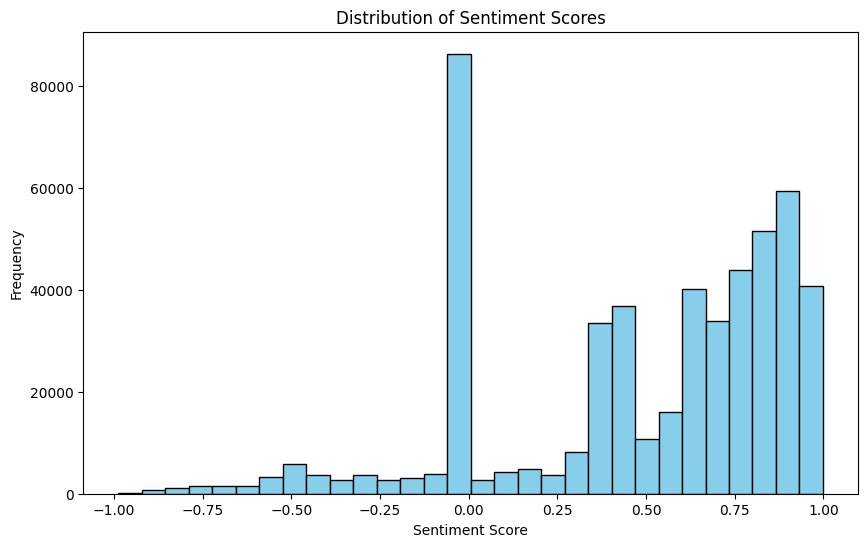

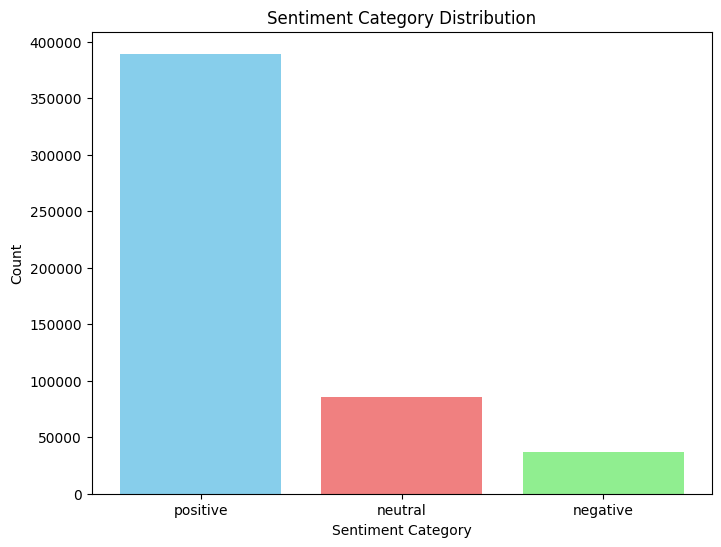

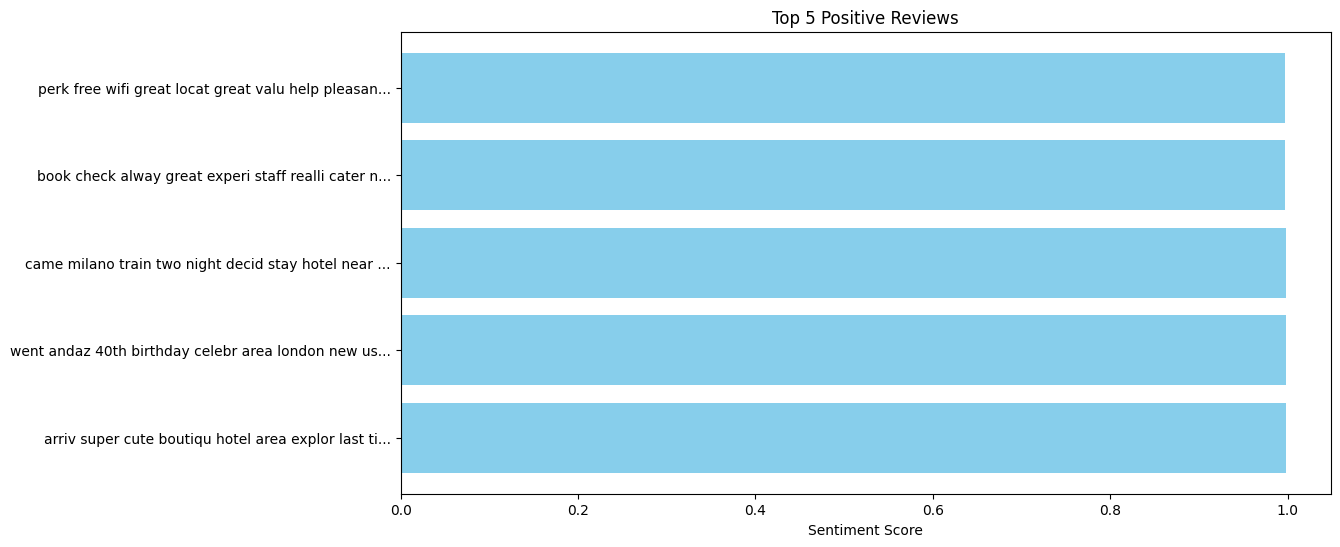

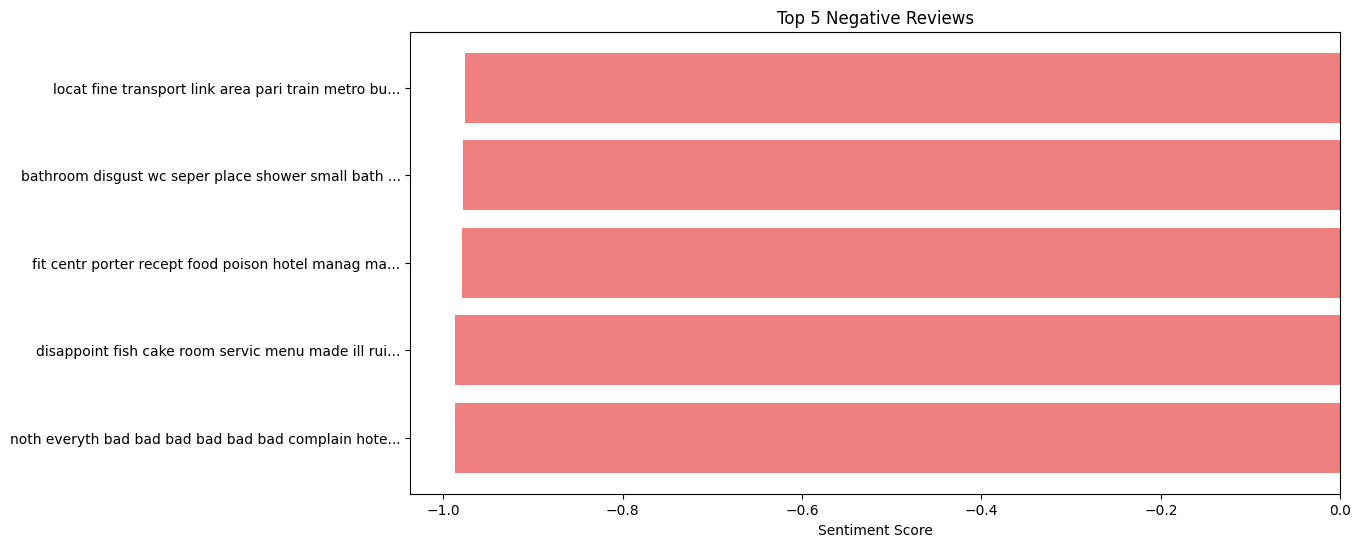

In [7]:
import matplotlib.pyplot as plt

# 1. Histogram of Sentiment Scores
plt.figure(figsize=(10, 6))
plt.hist(df['Sentiment_Score'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()

# 2. Bar chart of Sentiment Categories
sentiment_counts = df['Sentiment_Category'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Sentiment Category Distribution')
plt.show()

# 3. Horizontal bar chart of Top 5 Positive Reviews
top_positive = df.nlargest(5, 'Sentiment_Score')
plt.figure(figsize=(12, 6))
plt.barh(range(len(top_positive)), top_positive['Sentiment_Score'], color='skyblue')
plt.yticks(range(len(top_positive)), [review[:50] + "..." if len(review) > 50 else review for review in top_positive['Review']])
plt.xlabel('Sentiment Score')
plt.title('Top 5 Positive Reviews')
plt.show()

# 4. Horizontal bar chart of Top 5 Negative Reviews
top_negative = df.nsmallest(5, 'Sentiment_Score')
plt.figure(figsize=(12, 6))
plt.barh(range(len(top_negative)), top_negative['Sentiment_Score'], color='lightcoral')
plt.yticks(range(len(top_negative)), [review[:50] + "..." if len(review) > 50 else review for review in top_negative['Review']])
plt.xlabel('Sentiment Score')
plt.title('Top 5 Negative Reviews')
plt.show()

## Summary:

### 1. Q&A

* **What is the overall sentiment of the hotel reviews?** The average sentiment score is 0.4935, indicating a generally positive sentiment.  The majority of reviews (76.04%) are categorized as positive, based on a threshold of 0.05.
* **What is the distribution of sentiment categories?** 76.04% of reviews are positive, 16.75% are neutral, and 7.20% are negative.
* **What are some examples of highly positive and negative reviews?**  The analysis identified the top 5 most positive and negative reviews, which highlight specific aspects of hotel experiences that customers appreciated or disliked.  (Specific review text is available in the code's output).

### 2. Data Analysis Key Findings

* **Average Sentiment Score:** The average sentiment score across all reviews is 0.4935, suggesting a predominantly positive overall sentiment.
* **Sentiment Category Distribution:**  A significant portion (76.04%) of reviews fall into the positive category, while 16.75% are neutral and 7.20% are negative.
* **Missing Data Impact:**  0.63% of data was removed due to missing latitude and longitude values.


### 3. Insights or Next Steps

* **Target Areas for Improvement:** Focus on the aspects mentioned in the negative reviews (e.g., cleanliness, food quality) to enhance customer satisfaction.
* **Deep Dive into Neutral Reviews:** Investigate the neutral reviews further to understand the reasons behind the neutral sentiment and identify potential areas for improvement.
